In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
from pathlib import Path
import appdirs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd


In [3]:
results2, repetead_bars2 = torch.load('raw_results.pt')

In [ ]:
# for only_take_n_bars in [64, 32, 16, 8, 4]:
for only_take_n_bars in [32]:
    ics_summed_notes, win_ics_notes, notes_window_counts,  ics_summed_tt, win_ics_tt, tt = zip(*results2)
    pieces = [str(s.name)[:7] for s in  (Path(appdirs.user_cache_dir(), 'pia_eval').glob('*.pt'))]
    succes_mask = np.array([True if x is not None and not np.isnan(x).any() else False for x in ics_summed_tt])
    bar_slice = slice(0, only_take_n_bars)
    arr = [x for x,b in zip(ics_summed_tt, succes_mask) if b]
    arr = [(a/np.max(a))[bar_slice] for a in arr]
    pieces = [p for p,b in zip(pieces, succes_mask) if b]
    for i, p in enumerate(pieces):
        ic_summed_success = np.concatenate(arr[i:i+1])
        success_tt = np.concatenate([x[bar_slice] for x,b in zip(tt,succes_mask) if b][i:i+1])
        ic_success_summed_std = (ic_summed_success - ic_summed_success.mean())/np.std(ic_summed_success)
        success_tt_cd_std = (success_tt['cloud_diameter'] - success_tt['cloud_diameter'].mean())/np.std(success_tt['cloud_diameter'])
        fig, ax = plt.subplots(figsize=(20,9))
        lw = 2.0
        ms = 5
        ax.plot(np.arange(1, len(ic_success_summed_std)+1), ic_success_summed_std, '-o', linewidth=lw, markersize=ms)
        ax.plot(np.arange(1, len(ic_success_summed_std)+1), success_tt_cd_std, '-o', linewidth=lw, markersize=ms)
        ax.plot(np.arange(1, len(ic_success_summed_std)+1), ic_success_summed_std*success_tt_cd_std, '-o', linewidth=lw, markersize=ms)
        ax.legend(['IC', 'TT', 'IC*TT'])
        # Set major ticks at multiples of 16
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

        # Set minor ticks at multiples of 8
        # ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

        # Set tick parameters
        ax.tick_params(which='major', length=10, width=2)
        ax.tick_params(which='minor', length=5, width=.5)
        ax.grid(True, 'both')
        ax.set_title(f'piece {p}, first_n_bars={only_take_n_bars}')
        fig.savefig(f'out/quant/figs/std_scores/{p}.pdf')
        # for tension in ['cloud_diameter', 'cloud_momentum' , 'tensile_strain']:
        for tension in ['cloud_diameter']:
        # for tension in ['cloud_momentum']:
            print(f'piece {p}, first_n_bars={only_take_n_bars}, tension={tension}, (corr,p-val)=',pearsonr(ic_summed_success, success_tt[tension]))



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
piece kv333_2, first_n_bars=32, tension=cloud_diameter, (corr,p-val)= (0.5359751751250279, 0.0015684405565975917)
piece kv284_2, first_n_bars=32, tension=cloud_diameter, (corr,p-val)= (0.7377930887079543, 1.4478422643682187e-06)
piece kv283_2, first_n_bars=32, tension=cloud_diameter, (corr,p-val)= (0.19955292196636315, 0.2735214387632516)
piece kv333_1, first_n_bars=32, tension=cloud_diameter, (corr,p-val)= (-0.4913066761055851, 0.004296786517977943)
piece kv282_2, first_n_bars=32, tension=cloud_diameter, (corr,p-val)= (0.0838622515396516, 0.648154455627274)
piece kv332_3, first_n_bars=32, tension=cloud_diameter, (corr,p-val)= (0.044174423758678236, 0.810281211830639)
piece kv283_3, first_n_bars=32, tension=cloud_diameter, (corr,p-val)= (0.45030923398549244, 0.009703880878147974)
piece kv330_1, first_n_bars=32, tension=cloud_diameter, (corr,p-val)= (0.6696203356042352, 2.773255592676471e-05)
piece k

KeyboardInterrupt: 

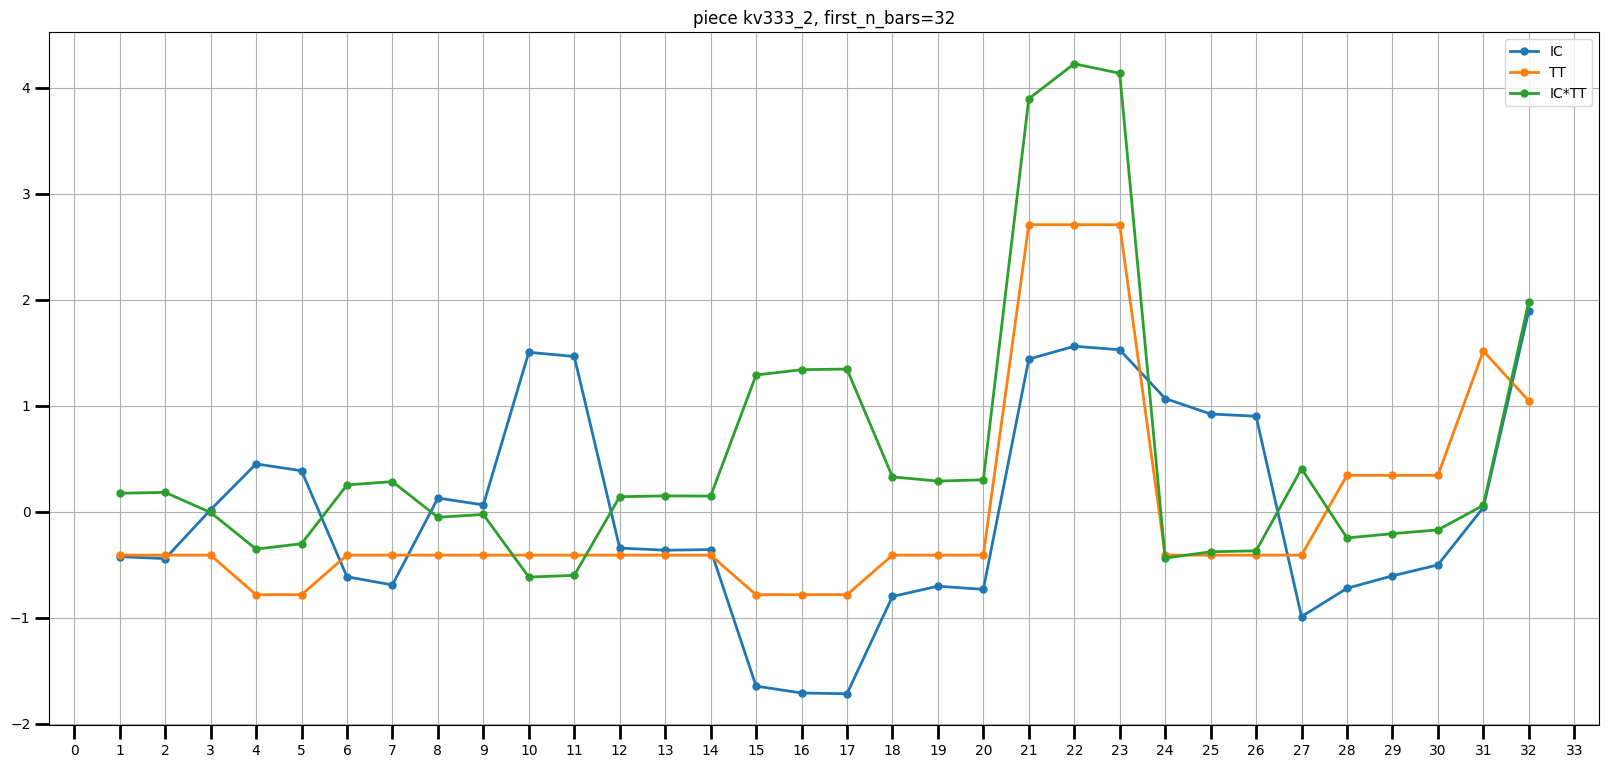

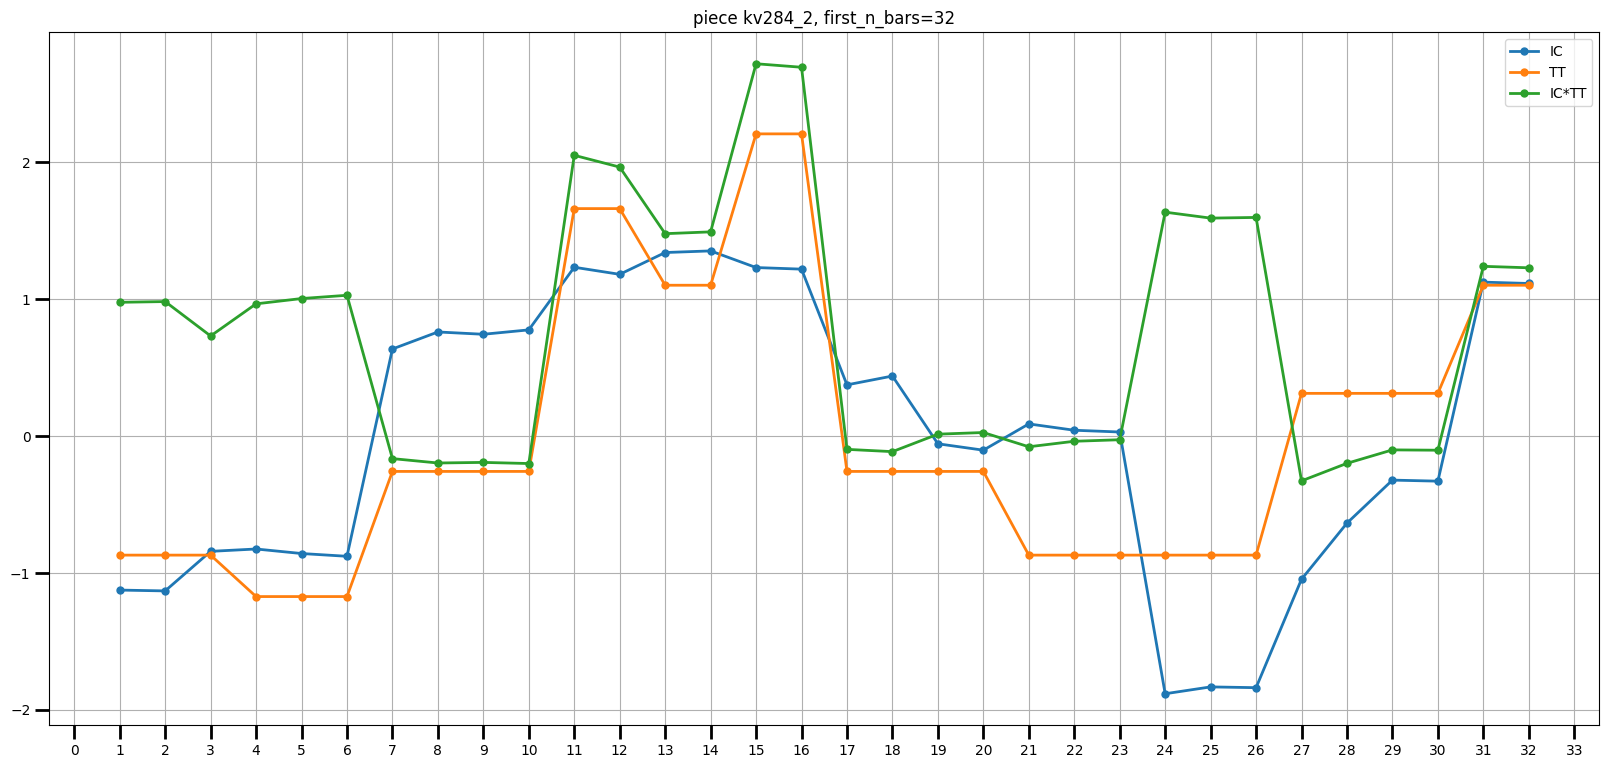

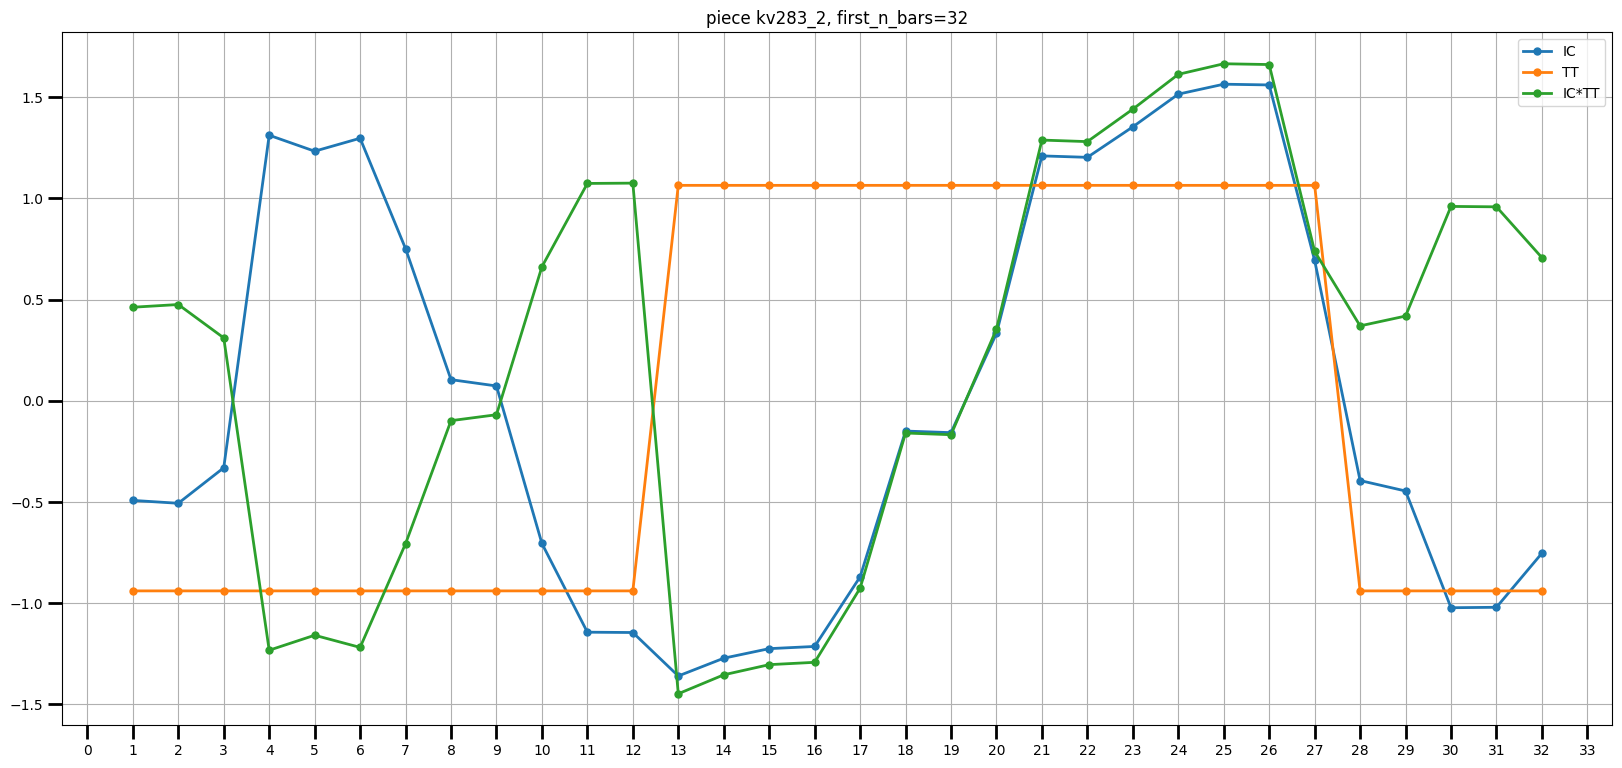

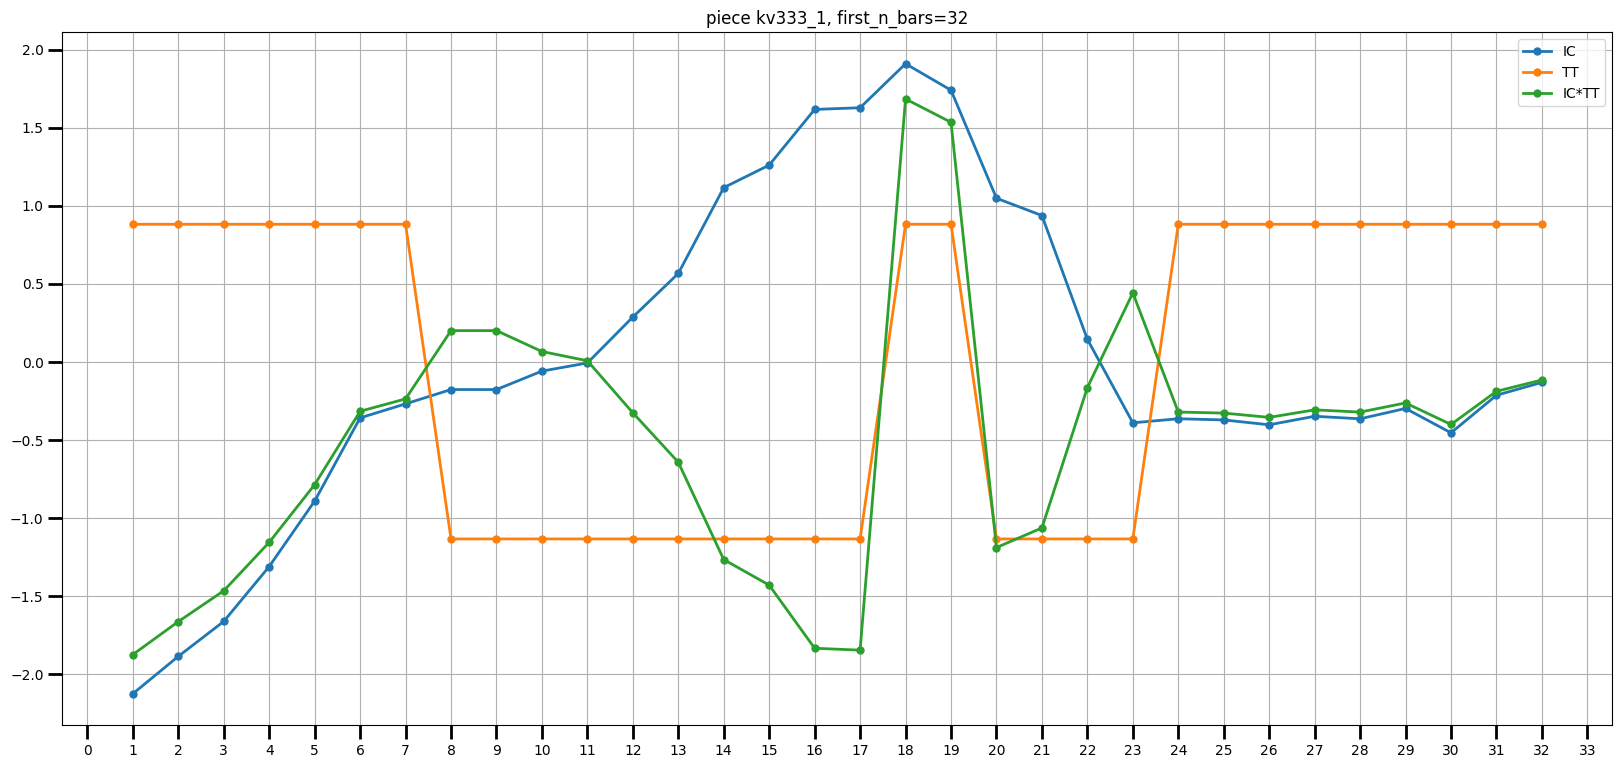

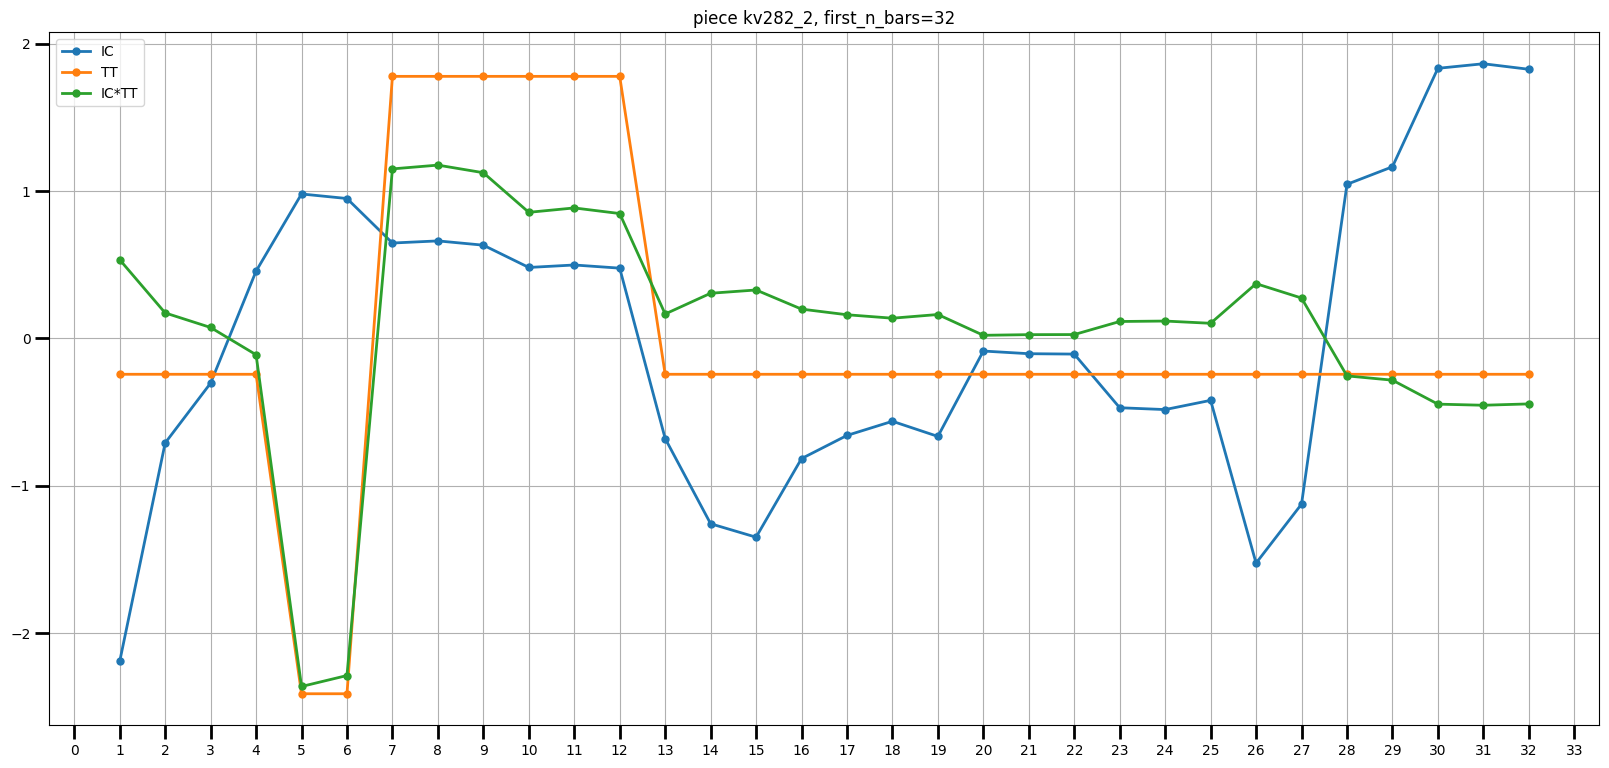

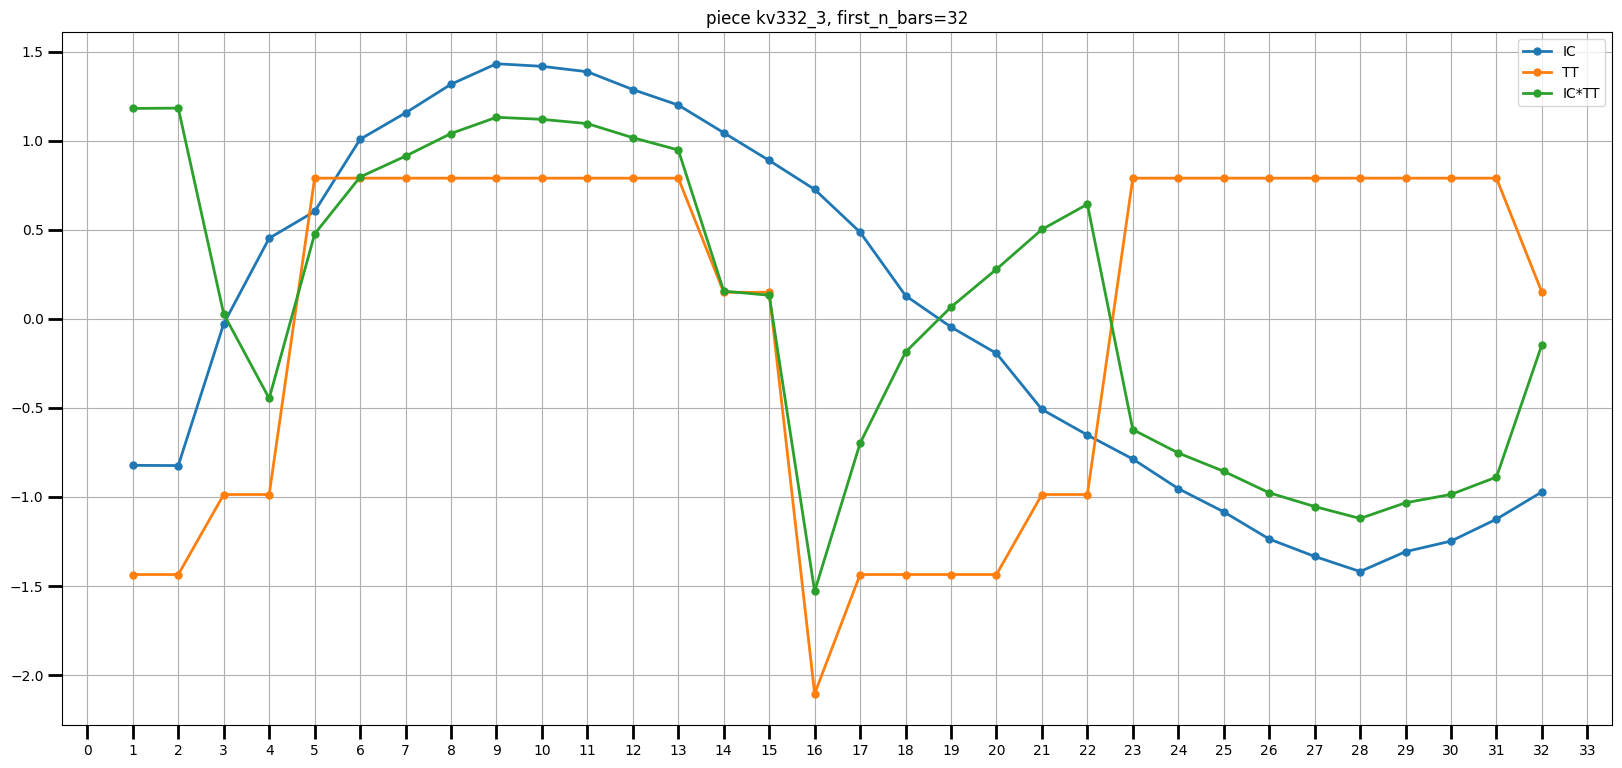

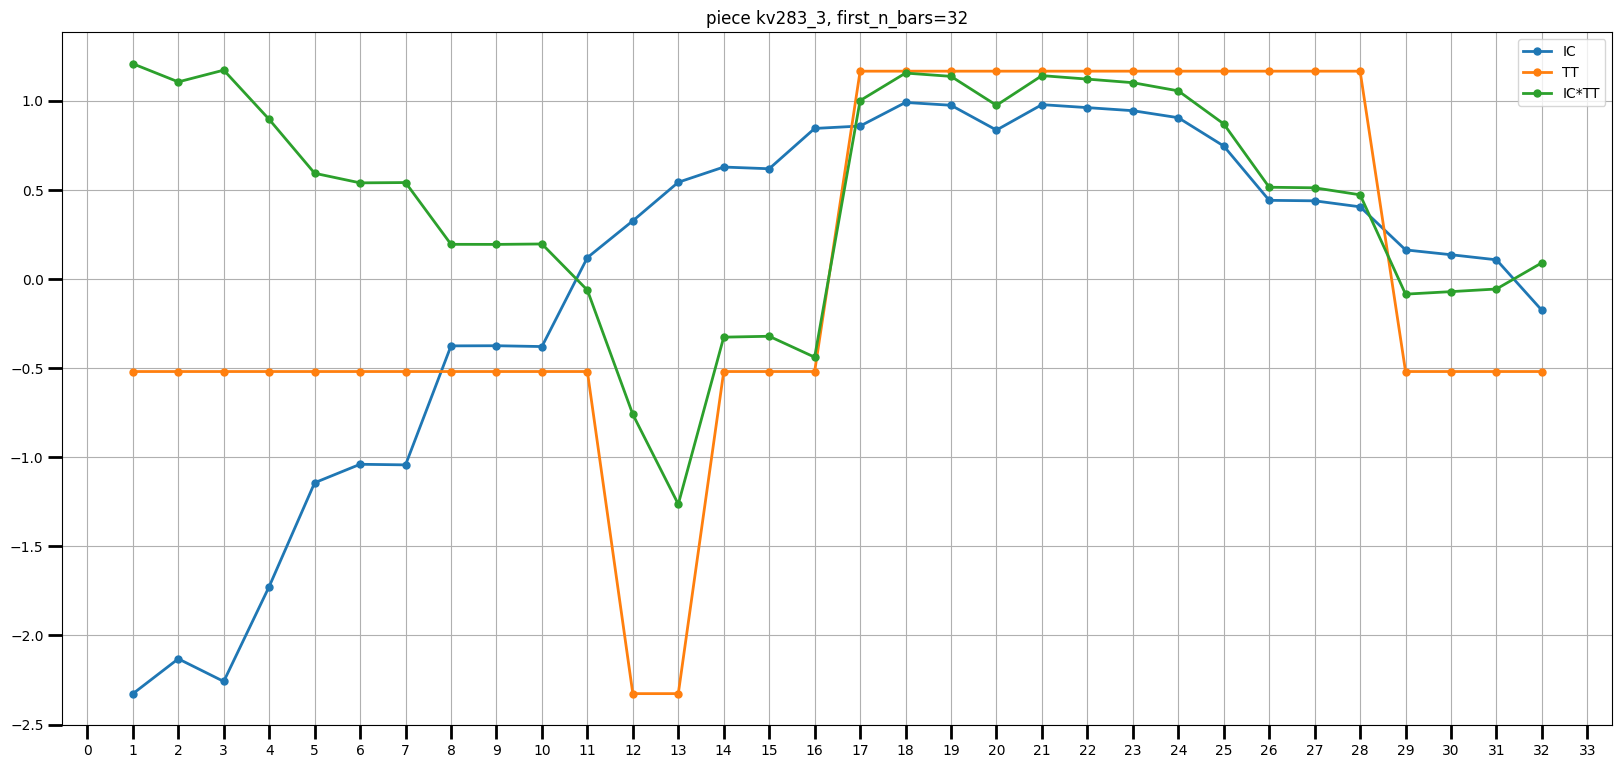

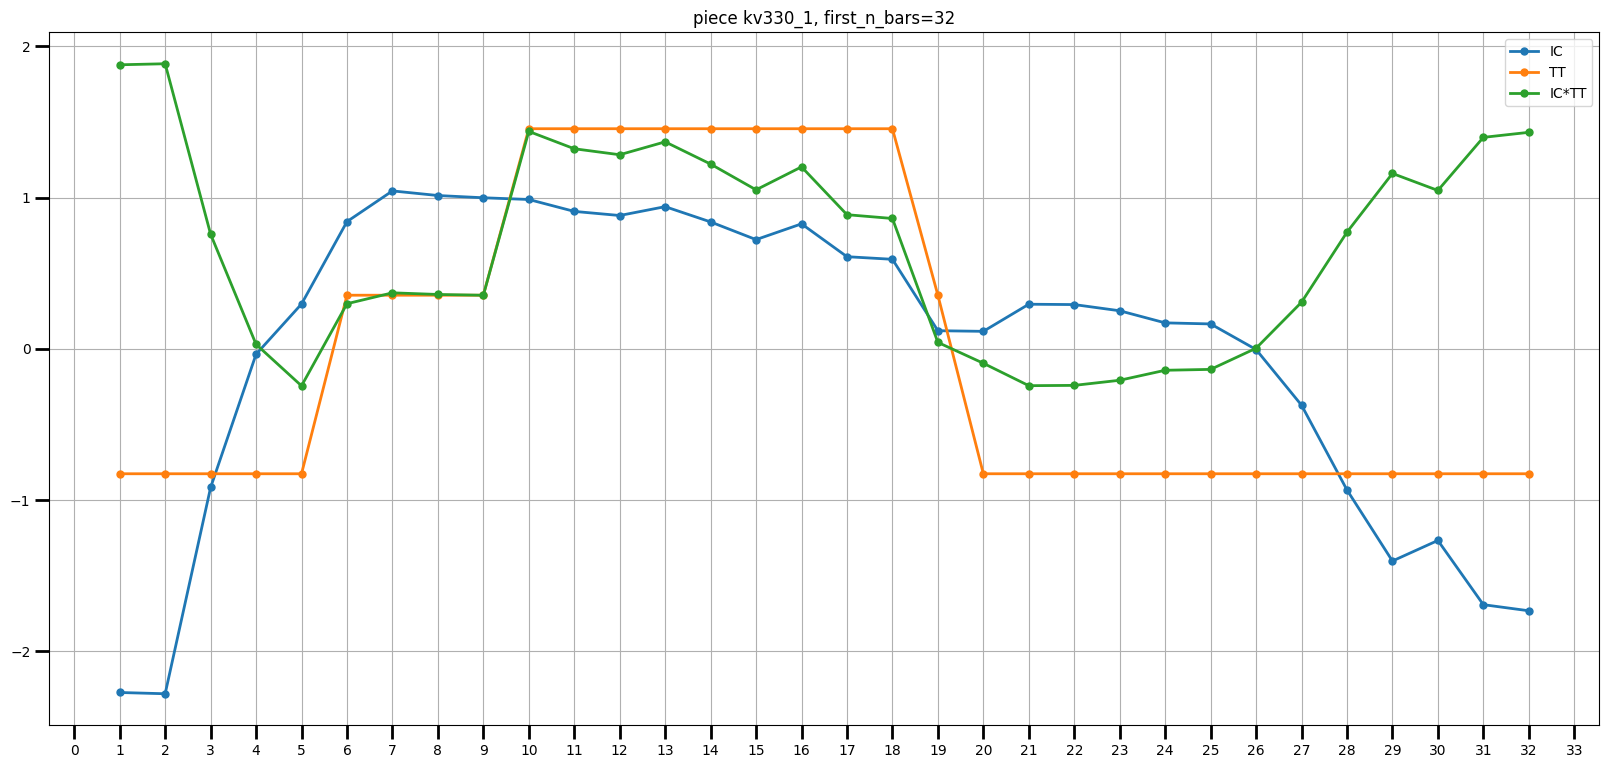

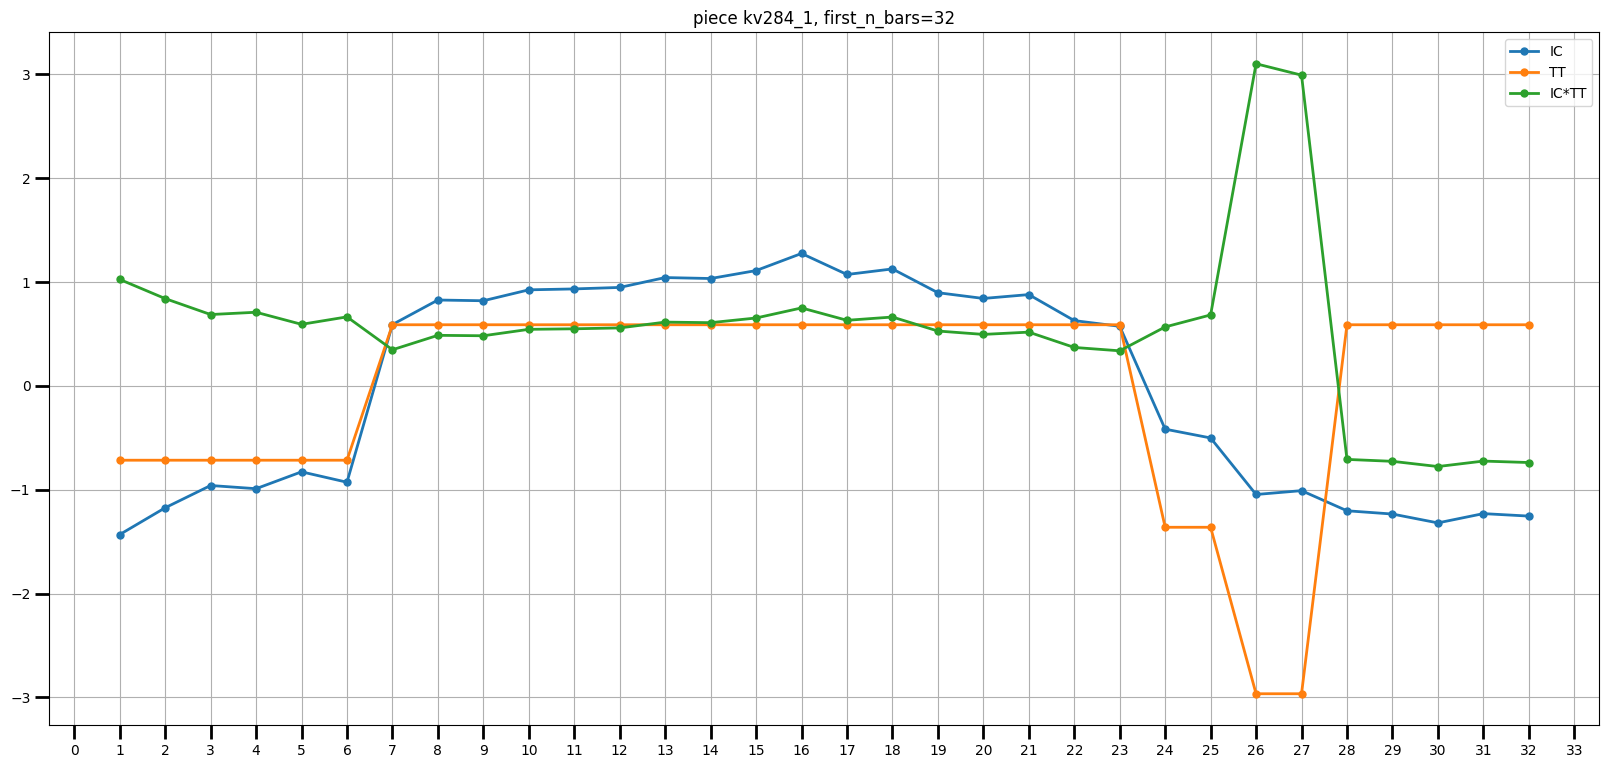

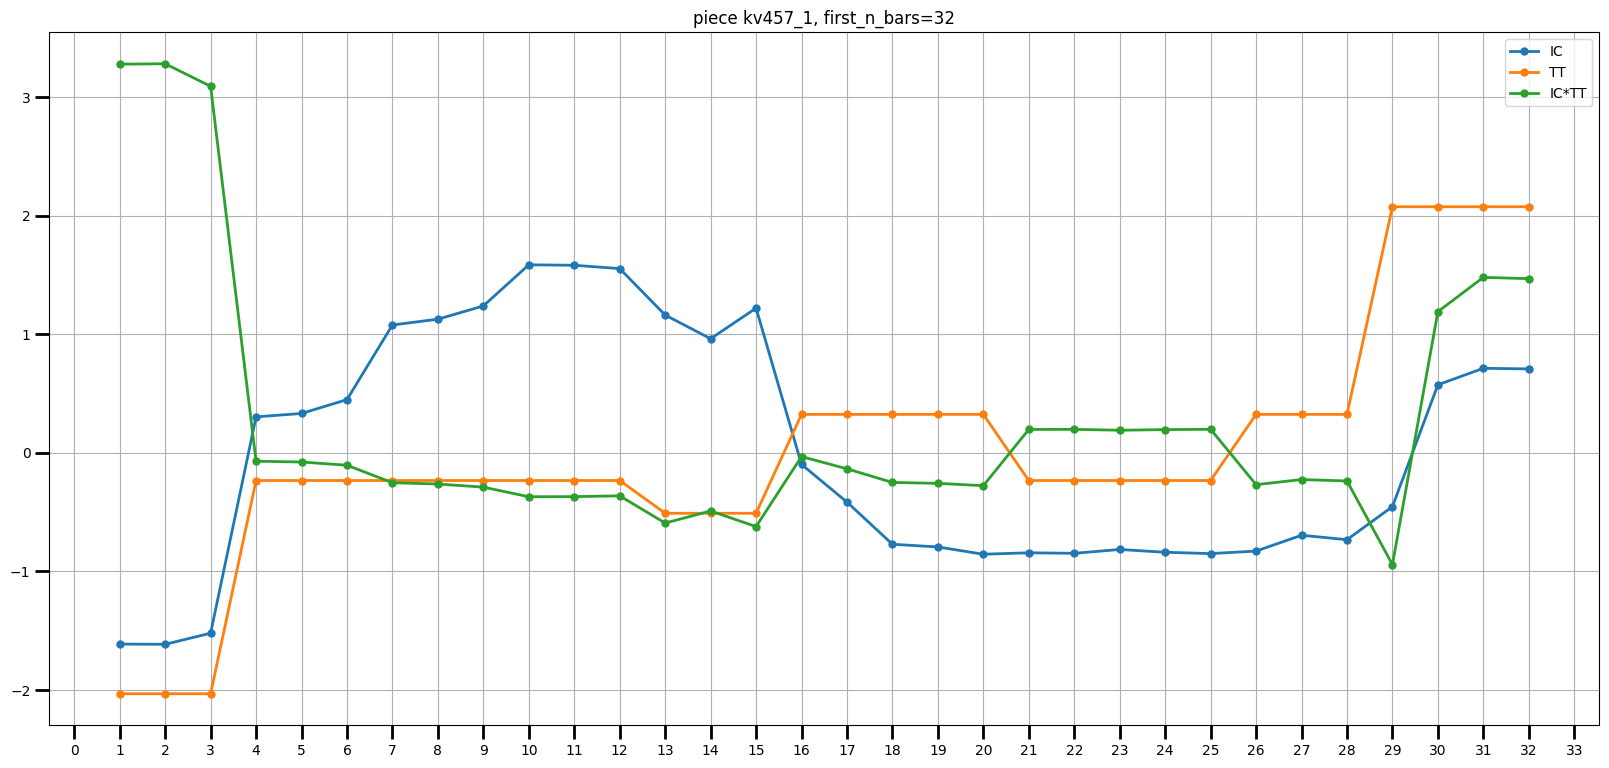

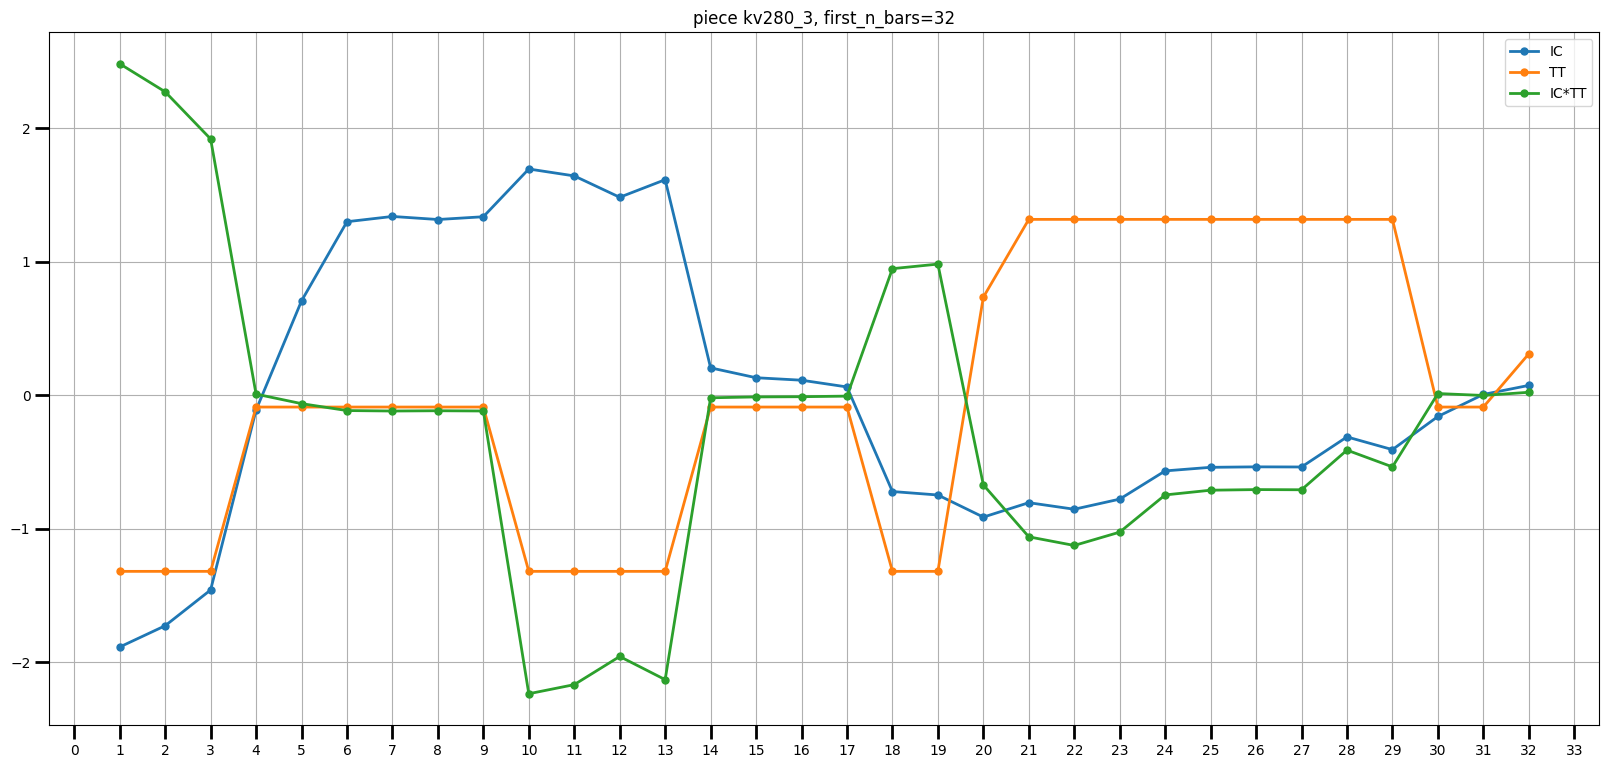

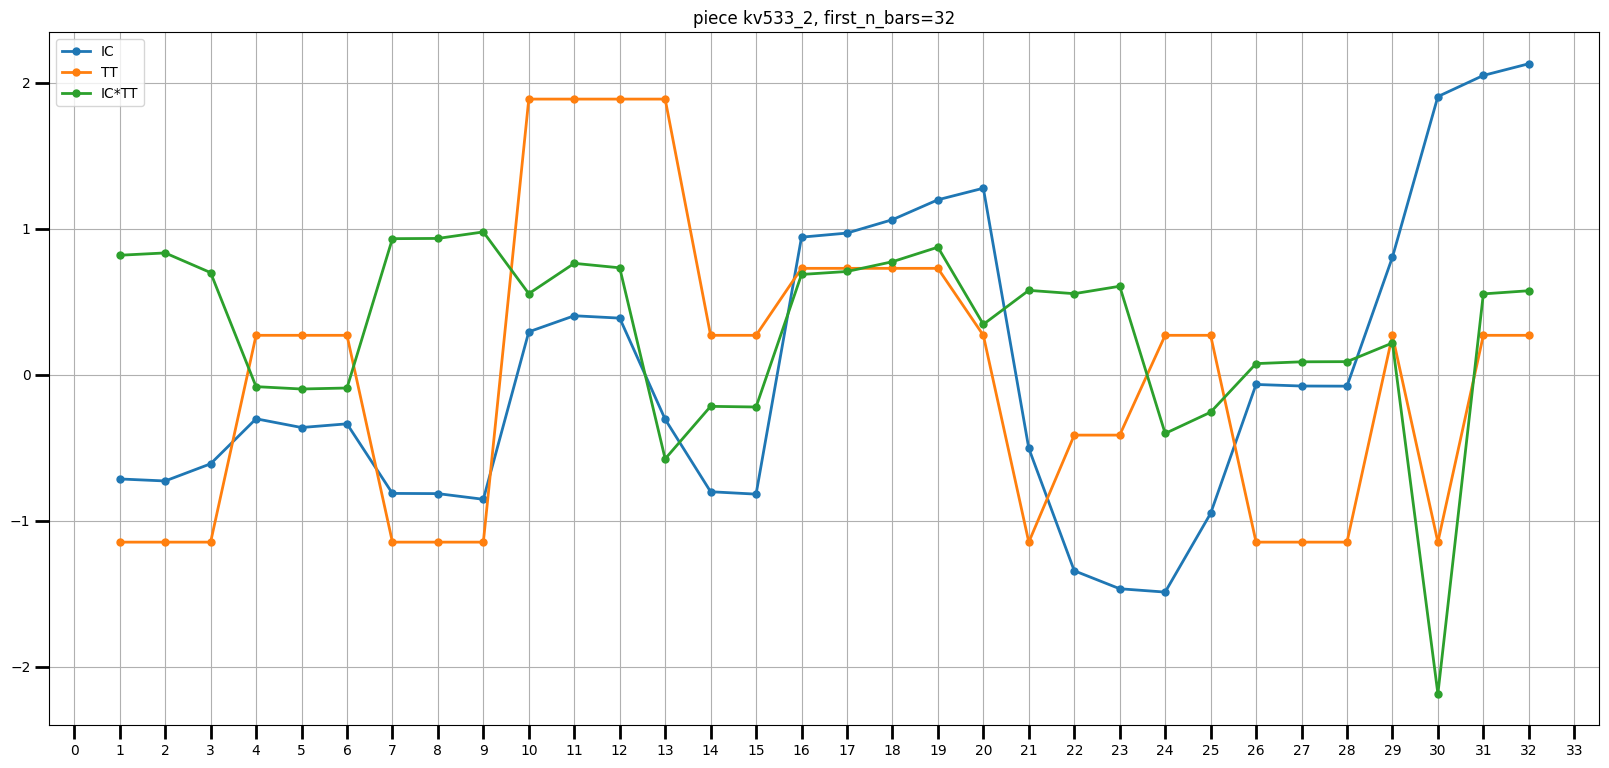

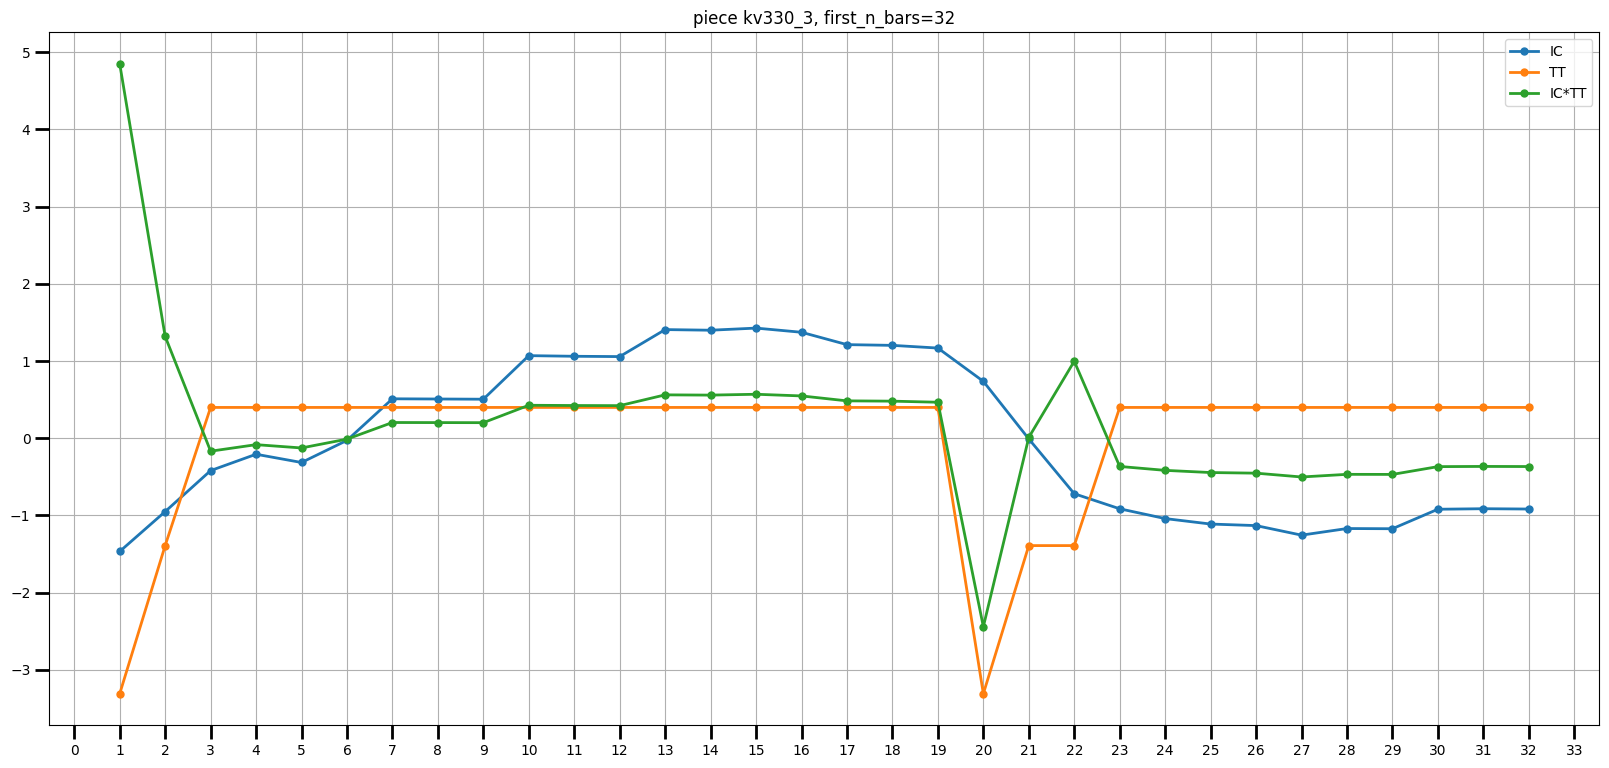

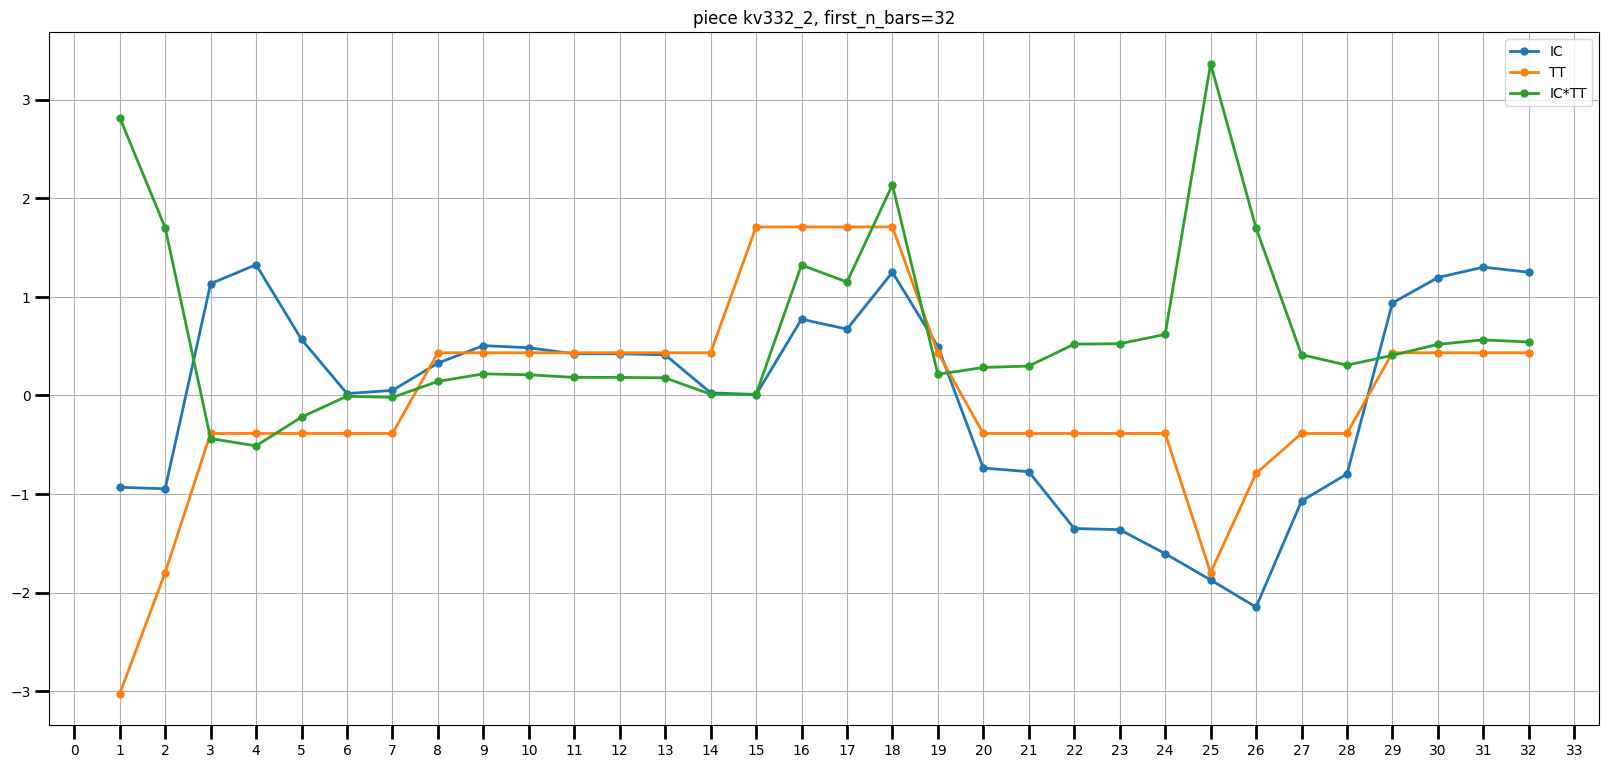

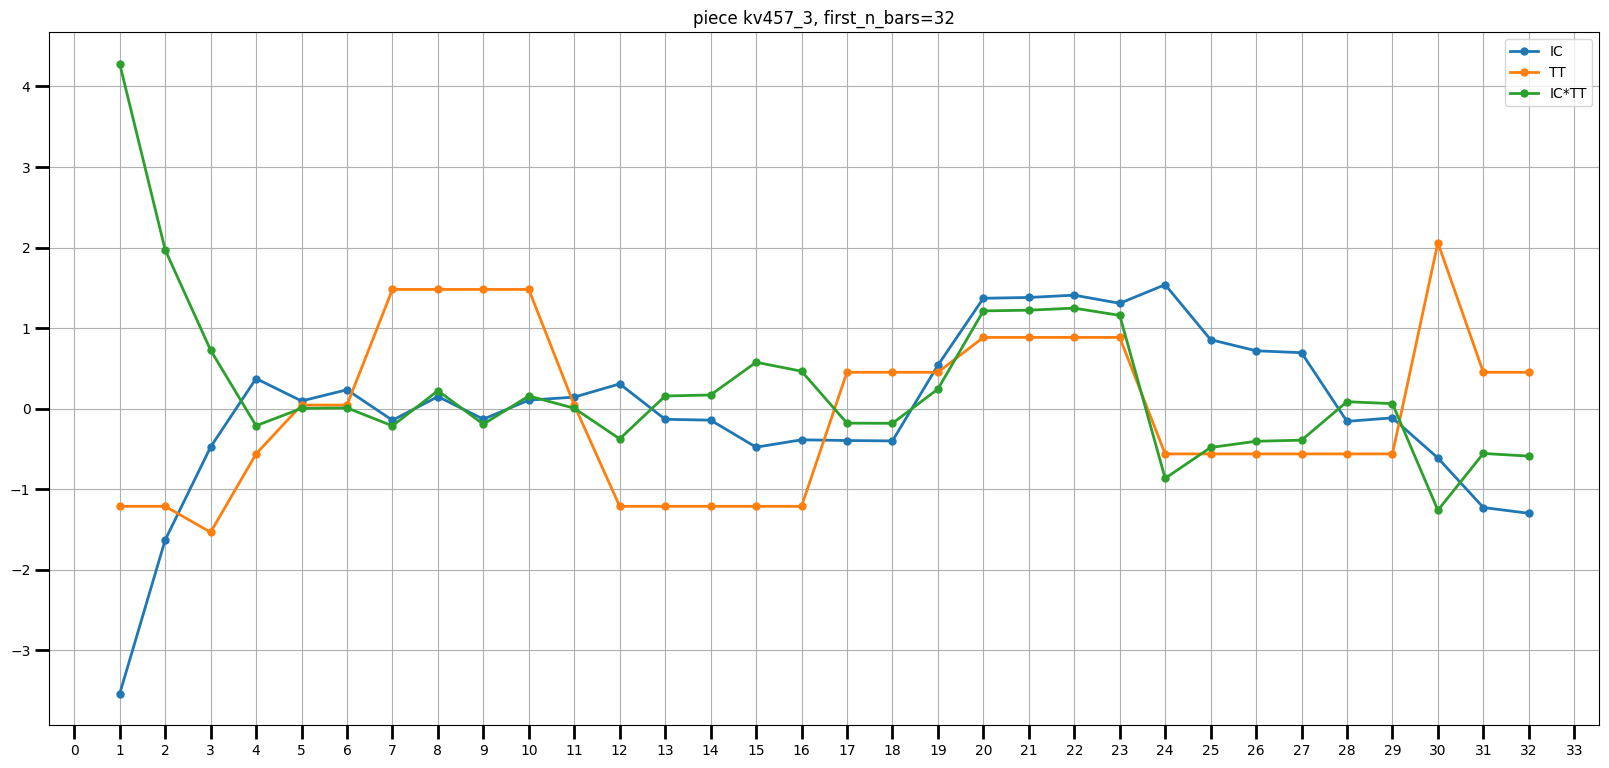

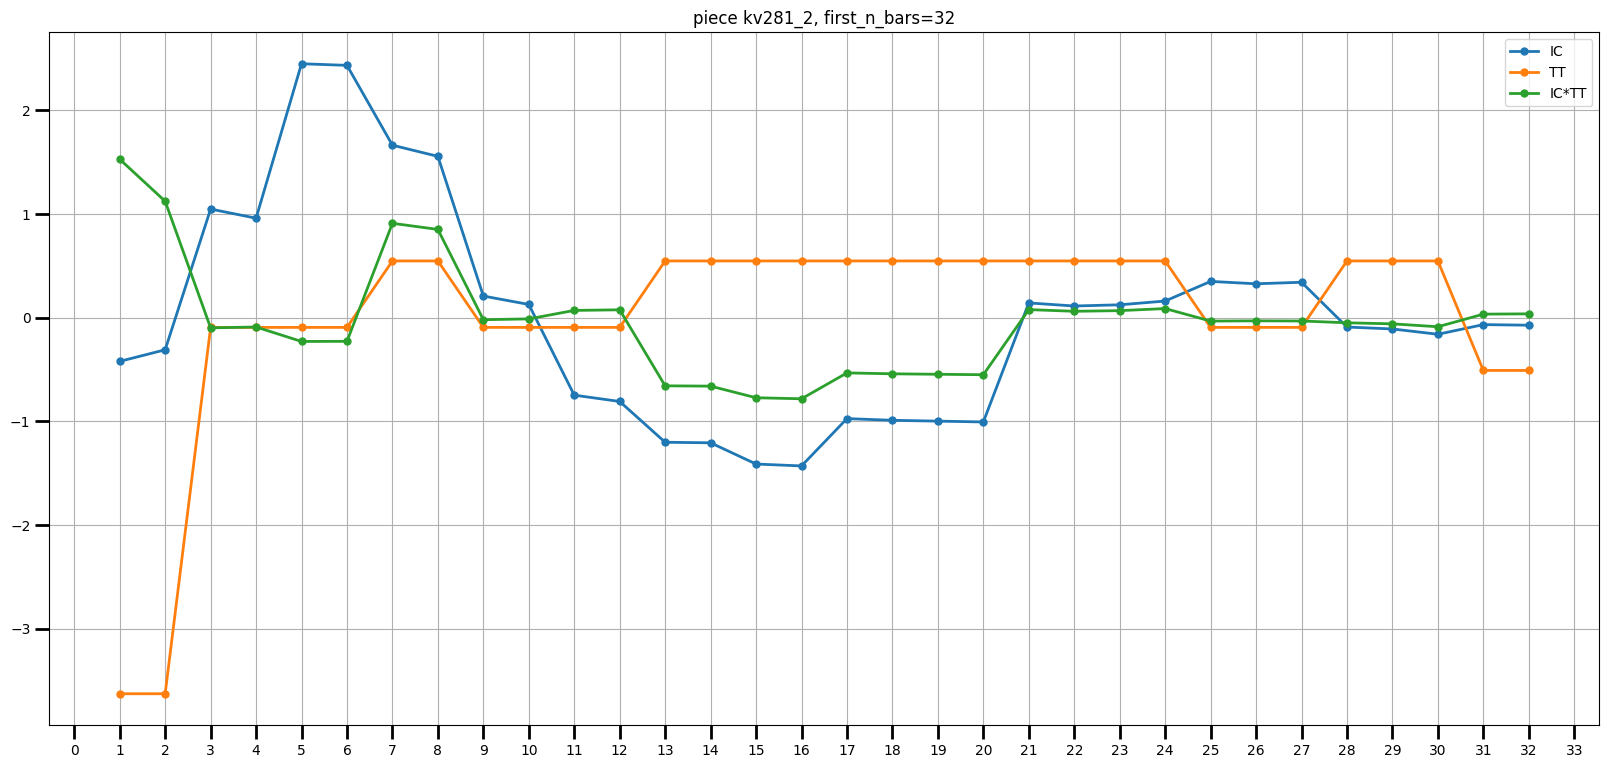

In [3]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
from pathlib import Path
import appdirs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

results2, repetead_bars2 = torch.load('raw_results.pt')
# for only_take_n_bars in [64, 32, 16, 8, 4]:
for only_take_n_bars in [32]:
    ics_summed_notes, win_ics_notes, notes_window_counts,  ics_summed_tt, win_ics_tt, tt = zip(*results2)
    pieces = [str(s.name)[:7] for s in  (Path(appdirs.user_cache_dir(), 'pia_eval').glob('*.pt'))]
    succes_mask = np.array([True if x is not None and not np.isnan(x).any() else False for x in ics_summed_tt])
    bar_slice = slice(0, only_take_n_bars)
    arr = [x for x,b in zip(ics_summed_tt, succes_mask) if b]
    arr = [(a/np.max(a))[bar_slice] for a in arr]
    pieces = [p for p,b in zip(pieces, succes_mask) if b]
    for i, p in enumerate(pieces):
        ic_summed_success = np.concatenate(arr[i:i+1])
        success_tt = np.concatenate([x[bar_slice] for x,b in zip(tt,succes_mask) if b][i:i+1])
        ic_success_summed_std = (ic_summed_success - ic_summed_success.mean())/np.std(ic_summed_success)
        success_tt_cd_std = (success_tt['cloud_diameter'] - success_tt['cloud_diameter'].mean())/np.std(success_tt['cloud_diameter'])
        fig, ax = plt.subplots(figsize=(20,9))
        lw = 2.0
        ms = 5
        ax.plot(np.arange(1, len(ic_success_summed_std)+1), ic_success_summed_std, '-o', linewidth=lw, markersize=ms)
        ax.plot(np.arange(1, len(ic_success_summed_std)+1), success_tt_cd_std, '-o', linewidth=lw, markersize=ms)
        ax.plot(np.arange(1, len(ic_success_summed_std)+1), ic_success_summed_std*success_tt_cd_std, '-o', linewidth=lw, markersize=ms)
        ax.legend(['IC', 'TT', 'IC*TT'])
        # Set major ticks at multiples of 16
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

        # Set minor ticks at multiples of 8
        # ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

        # Set tick parameters
        ax.tick_params(which='major', length=10, width=2)
        ax.tick_params(which='minor', length=5, width=.5)
        ax.grid(True, 'both')
        ax.set_title(f'piece {p}, first_n_bars={only_take_n_bars}')
        fig.savefig(f'out/quant/figs/std_scores/{p}.pdf')
        # for tension in ['cloud_diameter', 'cloud_momentum' , 'tensile_strain']:
        for tension in ['cloud_diameter']:
        # for tension in ['cloud_momentum']:
            print(f'piece {p}, first_n_bars={only_take_n_bars}, tension={tension}, (corr,p-val)=',pearsonr(ic_summed_success, success_tt[tension]))


ics_summed_notes, win_ics_notes, notes_window_counts,  ics_summed_tt, win_ics_tt, tt = zip(*results2)
results2, repetead_bars2 = torch.load('raw_results_onsets.pt')
results2, repetead_bars2 = torch.load('raw_results_score_positions_all.pt')
ics_notes, win_ics_notes, notes_window_counts,  ics_tt, win_ics_tt, tt = zip(*results2)
ics_tt[0]
success_tt = np.concatenate([x[bar_slice] for x,b in zip(tt,succes_mask) if b])
success_tt[0]
np.array([(win_ic*mask).sum(axis=1).mean().item() for sublist in ics_tt for win_ic in sublist])
results2, repetead_bars2 = torch.load('raw_results_score_positions_all.pt')
# for only_take_n_bars in [64, 32, 16, 8, 4]:
take_ns = range(2,20,1)
corrs = []
corrs_ps = []

ics_notes, win_ics_notes, notes_window_counts,  ics_tt, win_ics_tt, tt = zip(*results2)
for only_take_n_bars in take_ns:
    corr_ex = []
    ps_ex = []
    for channels in ['pitch','timeshift','all']:
        if channels=='pitch':
            mask = torch.tensor([True, False, False, False])
        elif channels=='timeshift':
            mask = torch.tensor([False, False, False, True])
        elif channels=='all':
            mask = torch.tensor([True, False, False, True])
        else:
            raise ValueError('channels must be one of pitch, timeshift, all')
        ics_summed_tt = [[(win_ic.T[mask]).sum(axis=0).mean().item() for win_ic in sublist] for sublist in ics_tt]
        succes_mask = np.array([True if x is not None and not np.isnan(x).any() else False for x in ics_summed_tt])
        bar_slice = slice(0, only_take_n_bars)
        arr = [x[bar_slice] for x,b in zip(ics_summed_tt, succes_mask) if b]
        ic_summed_success = np.concatenate(arr)
        success_tt = np.concatenate([x[bar_slice] for x,b in zip(tt,succes_mask) if b])
        succes_notes_window_counts = np.concatenate([x[bar_slice] for x,b in zip(notes_window_counts,succes_mask) if b])
        # ic_success_summed_std = (ic_success_summed - ic_success_summed.mean())/np.std(ic_success_summed)
        # success_tt_cd_std = (success_tt['cloud_diameter'] - success_tt['cloud_diameter'].mean())/np.std(success_tt['cloud_diameter'])
        corr_tt, ps_tt = zip(*[pearsonr(ic_summed_success, success_tt[tension]) for tension in ['cloud_diameter']]) #, 'cloud_momentum' , 'tensile_strain']])
        corr_nd, ps_nd = pearsonr(ic_summed_success, succes_notes_window_counts)
        corr_ex += list(corr_tt) + [corr_nd]
        ps_ex += list(ps_tt)+[ps_nd]
    corrs.append(corr_ex)
    corrs_ps.append(ps_ex)
            
fig, ax = plt.subplots()
pd.DataFrame(corrs, columns=['cd_p', 'nd_p', 'cd_t', 'nd_t', 'cd_b', 'nd_b'], index=take_ns).plot(ax=ax, 
                                                                                                                        #    marker='o',
                                                                                                                           xlabel='first n onsets', ylabel='pearson correlation')


In [35]:
np.transpose(np.array(corrs),[1,0,2]).shape #reshape((-1,6)).shape

(18, 3, 2)

<AxesSubplot:>

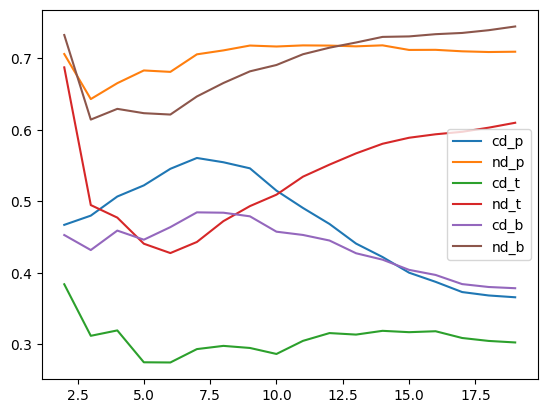

In [37]:
pd.DataFrame(np.transpose(np.array(corrs),[1,0,2]).reshape((-1,6)), columns=['cd_p', 'nd_p', 'cd_t', 'nd_t', 'cd_b', 'nd_b'], index=take_ns).plot()

In [5]:
results2, repetead_bars2 = torch.load('raw_results_score_positions_all.pt')
# for only_take_n_bars in [64, 32, 16, 8, 4]:
take_ns = range(1,1000,1)
corrs = []
corrs_ps = []

ics_notes, win_ics_notes, notes_window_counts,  ics_tt, win_ics_tt, tt = zip(*results2)
for channels in ['pitch','timeshift','all']:
    if channels=='pitch':
        mask = torch.tensor([True, False, False, False])
    elif channels=='timeshift':
        mask = torch.tensor([False, False, False, True])
    elif channels=='all':
        mask = torch.tensor([True, False, False, True])
    else:
        raise ValueError('channels must be one of pitch, timeshift, all')
    ics_summed_tt = [[(win_ic.T[mask]).sum(axis=0).sum().item() for win_ic in sublist] for sublist in ics_tt]

    corr_ex = []
    ps_ex = []
    for only_take_n_bars in take_ns:
        succes_mask = np.array([True if x is not None and not np.isnan(x).any() else False for x in ics_summed_tt])
        bar_slice = slice(0, only_take_n_bars)
        arr = [x[bar_slice] for x,b in zip(ics_summed_tt, succes_mask) if b]
        ic_summed_success = np.concatenate(arr)
        success_tt = np.concatenate([x[bar_slice] for x,b in zip(tt,succes_mask) if b])
        succes_notes_window_counts = np.concatenate([x[bar_slice] for x,b in zip(notes_window_counts,succes_mask) if b])
        # ic_success_summed_std = (ic_success_summed - ic_success_summed.mean())/np.std(ic_success_summed)
        # success_tt_cd_std = (success_tt['cloud_diameter'] - success_tt['cloud_diameter'].mean())/np.std(success_tt['cloud_diameter'])
        corr_tt, ps_tt = zip(*[pearsonr(ic_summed_success, success_tt[tension]) for tension in ['cloud_diameter']]) #, 'cloud_momentum' , 'tensile_strain']])
        corr_nd, ps_nd = pearsonr(ic_summed_success, succes_notes_window_counts)
        corr_ex.append(list(corr_tt) + [corr_nd])
        ps_ex.append(list(ps_tt)+[ps_nd])
    corrs.append(corr_ex)
    corrs_ps.append(ps_ex)
            
# fig, ax = plt.subplots()
# pd.DataFrame(np.transpose(np.array(corrs),[1,0,2]).reshape((-1,6)), columns=['cd_p', 'nd_p', 'cd_t', 'nd_t', 'cd_b', 'nd_b'], index=take_ns).plot(ax=ax,
                                                                                                                        # #    marker='o',
                                                                                                                        #    xlabel='first n onsets', ylabel='pearson correlation')

In [8]:
df_ps = pd.DataFrame(
    np.transpose(np.array(corrs_ps),[1,0,2]).reshape((-1,6)),
    columns=[r'$tt_{pitch}$', r'$d_{pitch}$', r'$tt_{timeshift}$', r'$d_{timeshift}$', r'$tt_{both}$', r'$d_{both}$'],
    index=take_ns
    )

In [10]:
df_ps.max()

$tt_{pitch}$        5.324073e-03
$d_{pitch}$         4.301942e-08
$tt_{timeshift}$    1.062710e-02
$d_{timeshift}$     5.234336e-08
$tt_{both}$         4.439914e-03
$d_{both}$          1.225022e-09
dtype: float64

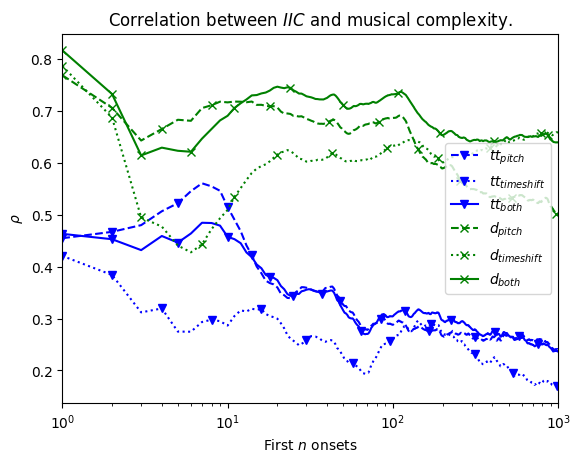

In [18]:
plt.rcParams['text.usetex'] = False
fig, ax = plt.subplots()

df_corrs = pd.DataFrame(
    np.transpose(np.array(corrs),[1,0,2]).reshape((-1,6)),
    columns=[r'$tt_{pitch}$', r'$d_{pitch}$', r'$tt_{timeshift}$', r'$d_{timeshift}$', r'$tt_{both}$', r'$d_{both}$'],
    index=take_ns
    )
colors = ['b','b','b','g','g','g']
df_corrs.iloc[:,[0,2,4,1,3,5]].plot(
        ax=ax,
        #    marker='o',
        color=colors,
        style=['--v',':v','-v','--x',':x','-x'],
        xlabel='First $n$ onsets',
        ylabel=r'$\rho$',
        markevery=.1
   )
# for column, marker in zip(df.columns, ['o', 'v', 's', 'D', 'h', '*']):
    # df[column].iloc[::50].plot(marker=marker, linestyle='None', ax=ax, color=colors)
ax.legend(loc="right")
ax.set_xlim(1, 1000)
ax.set_xscale('log')
ax.set_title('Correlation between $IIC$ and musical complexity.')
fig.savefig('iic_corr.pdf')
fig.show()


# df.iloc[::50].plot(style=['o', 'v', 's', 'D', 'h', '*'], linestyle='None', ax=ax, color=colors)


In [35]:
df_corrs.idxmax()

$tt_{pitch}$        7
$d_{pitch}$         1
$tt_{timeshift}$    1
$d_{timeshift}$     1
$tt_{both}$         7
$d_{both}$          1
dtype: int64

In [38]:
df_corrs.index

RangeIndex(start=1, stop=1000, step=1)

In [37]:
df_corrs.loc[7]

$tt_{pitch}$        0.560661
$d_{pitch}$         0.705646
$tt_{timeshift}$    0.293308
$d_{timeshift}$     0.443147
$tt_{both}$         0.484592
$d_{both}$          0.646710
Name: 7, dtype: float64

In [7]:
df_corrs

,$tt_{pitch}$,$d_{pitch}$,$tt_{timeshift}$,$d_{timeshift}$,$tt_{both}$,$d_{both}$
1,0.454793,0.768937,0.420672,0.786951,0.463221,0.816932
2,0.467101,0.706068,0.383991,0.687405,0.452880,0.732669
3,0.480010,0.643078,0.311899,0.494793,0.431872,0.614371
4,0.506756,0.665317,0.319443,0.477227,0.459084,0.629374
5,0.522307,0.683106,0.274852,0.440724,0.446335,0.623315
...,...,...,...,...,...,...
995,0.240720,0.500462,0.169916,0.658001,0.236801,0.639280
996,0.240573,0.500647,0.169799,0.657856,0.236650,0.639326
997,0.240455,0.500844,0.169666,0.657678,0.236509,0.639369
998,0.240381,0.501097,0.169544,0.657533,0.236401,0.639462


In [1]:
df_corrs

NameError: name 'df' is not defined

In [ ]:
fig, ax = plt.subplots()
pd.DataFrame(corrs, columns=['cloud_diameter', 'cloud_momentum' , 'tensile_strain', 'note_density'], index=take_ns)[['cloud_diameter','note_density']].plot(ax=ax, 
                                                                                                                        #    marker='o',
                                                                                                                           xlabel='first n onsets', ylabel='pearson correlation')

In [42]:
list(zip(*(corrs_ps)))[0]

(0.0304857832067301,
 8.42174226547775e-05,
 4.6172164816763283e-07,
 2.690284588229365e-10,
 4.3900056647846986e-14,
 1.881715769950703e-18,
 3.5561395455752807e-22,
 7.43331467627755e-24,
 4.4636044855585556e-26,
 1.867834545113777e-25,
 7.2270963612627545e-25,
 2.7433991223065024e-23,
 5.29302468848688e-21,
 2.4419568886780502e-20,
 1.0844470154628109e-19,
 1.0987806048762853e-18,
 7.665671009009172e-19,
 5.632613901919917e-19,
 1.0805161284480033e-19,
 6.975369789117289e-20,
 4.1506973051785174e-20,
 7.085301508585936e-20,
 6.586021362780101e-20,
 4.203969166476542e-20,
 1.1699918244282016e-20,
 1.8126128888066643e-21,
 5.891476071072257e-22,
 8.358764774470415e-23,
 3.1119100406691333e-22,
 1.060859541471491e-21,
 1.1403060344519457e-21,
 8.421639700216131e-22,
 5.656530732392443e-22,
 2.1301273550135777e-22,
 8.785043164647184e-23,
 1.3520804672789415e-23,
 6.4984865843483445e-24,
 1.0013257699499258e-24,
 1.9130881400106334e-26,
 1.221901964587461e-27,
 3.2350782800035237e-29,
 